In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
#這一行表示不希望看到警告訊息
warnings.filterwarnings(action='ignore')

df=pd.read_csv("heart_cleveland_upload.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [4]:
#有些欄位應該是數值，卻是object，因為有空值(nan)造成，以下三個欄位是肉眼觀察到的
mistyped=['age','cp','trestbps','chol','thalach','slope','ca','thal']
numeric=[]

for i in df.columns:
    if df[i].dtype=='float64':
        numeric.append(i)

#將float64的欄位與肉眼觀察到的欄位合起來，都應該是numberic才對
numeric=numeric+mistyped

In [5]:
#看看數值型欄位
numeric

['oldpeak', 'age', 'cp', 'trestbps', 'chol', 'thalach', 'slope', 'ca', 'thal']

In [6]:
#接下來處理類別欄位，且排除掉我們的數值型欄位
mistyped0=['sex','fbs','restecg','exang']
categoricals=[]

for col in df.columns:
    if not col in numeric:
        categoricals.append(col)

In [7]:
#看看類別欄位
categoricals

['sex', 'fbs', 'restecg', 'exang', 'condition']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


<AxesSubplot: >

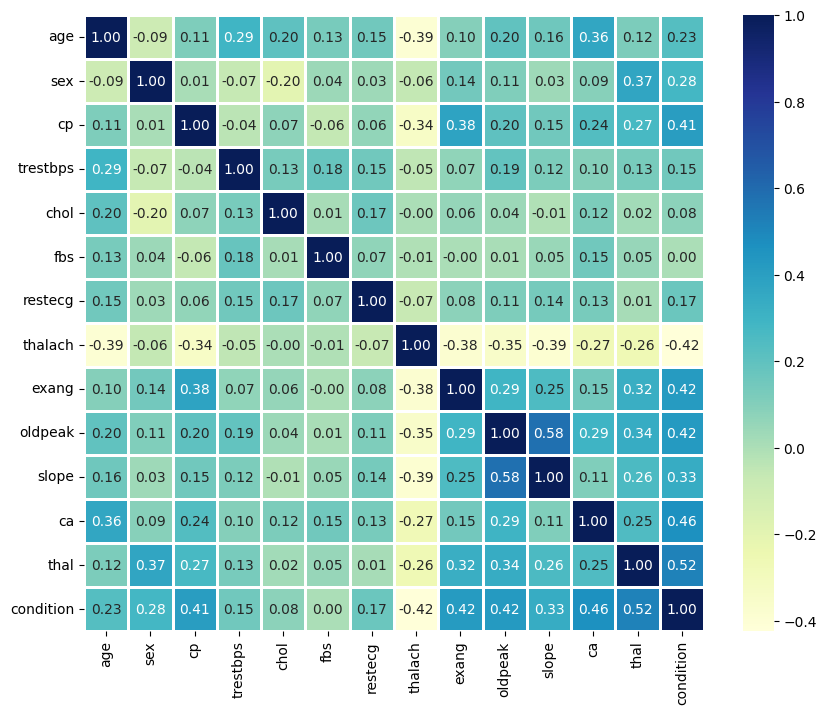

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)

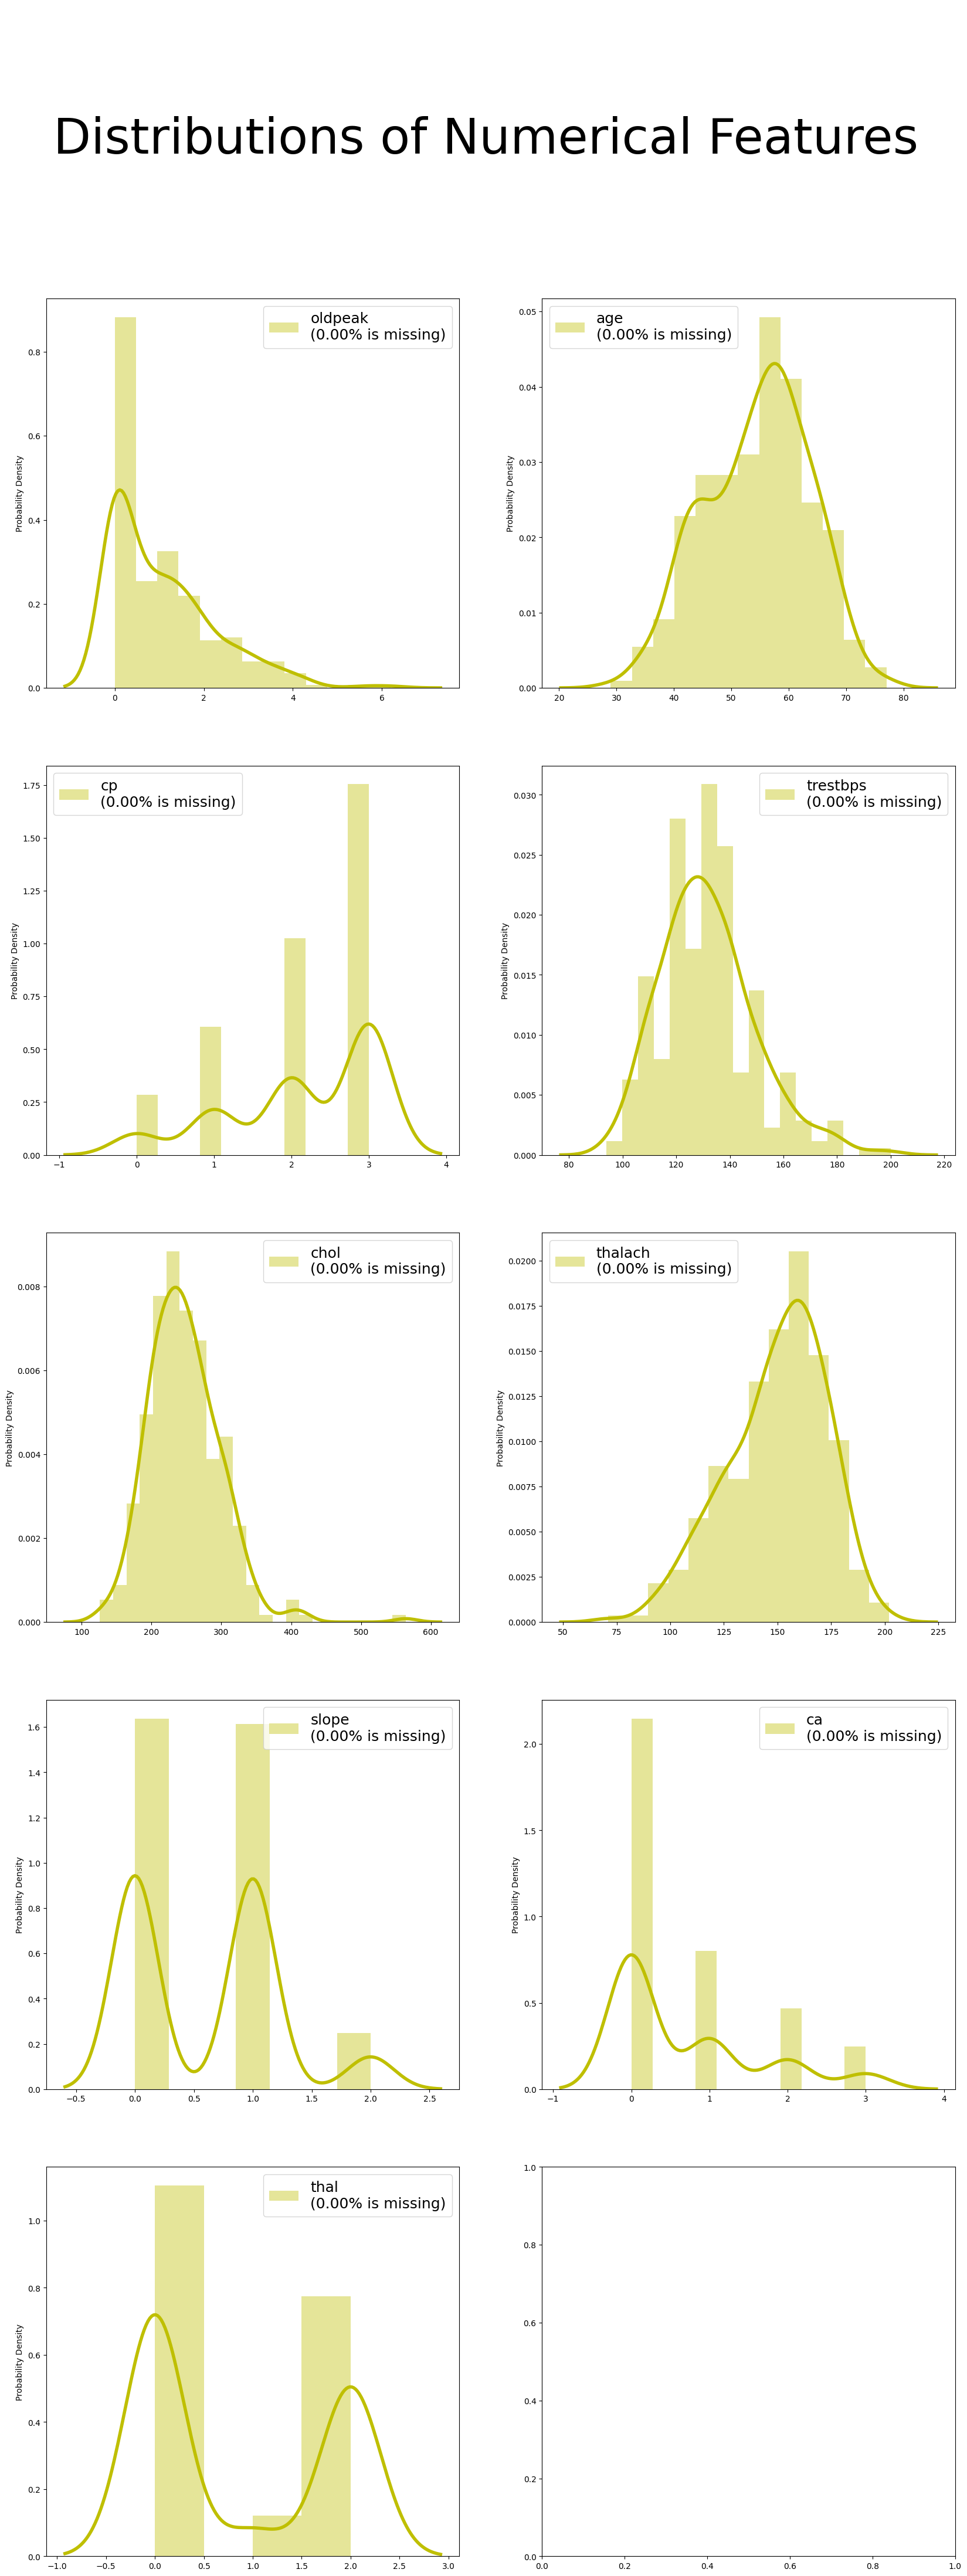

In [10]:
#一覽表視覺化，繪製 (5x2) 的圖表
#數值型欄位

#5x2的圖表
n_rows, n_cols = (5,2)

#每一張圖表大小為20x50
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))

#給予這張一覽表名稱
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

#走訪每一個數值型欄位
#陣列變為 index, column走訪方式，要透過enumerate
for index, column in enumerate(numeric):
    
    #index由0開始
    #例如: 5//2為2(商數)，5%2為1(餘數)
    i,j = (index // n_cols), (index % n_cols)
    
    #計算該欄位去除空值的數量除以該欄位總數量的百分比
    miss_perc="%.2f"%(100*(1-(df[column].dropna().shape[0])/df.shape[0]))
    
    #文字敘述該欄位遺缺值的百分比
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    #透過seaborn的distplot針對該欄位畫圖
    #需增加常態分佈的線條
    fig=sns.distplot(df[column], color="y", label=collabel, norm_hist=True,
    
    #指派圖形位置，KDE線條寬度為4
    ax=axes[i,j], kde_kws={"lw":4})
    
    #在圖片中顯示文字說明
    #顯示的位置由程式自行判斷 (loc為best)
    fig=fig.legend(loc='best', fontsize=18)
    
    #定義每張圖的y軸說明文字
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    #定義每張圖x軸說明文字為無
    axes[i,j].set_xlabel(None)

plt.show()

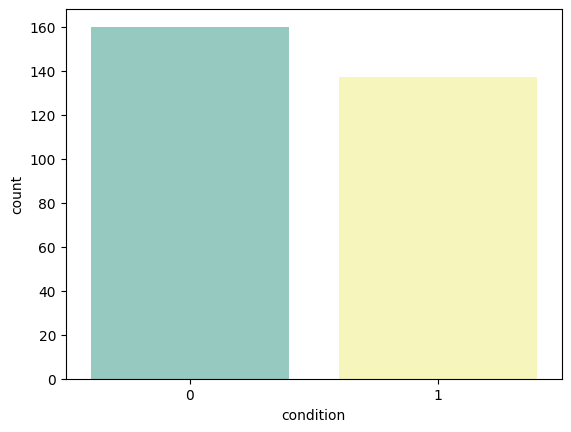

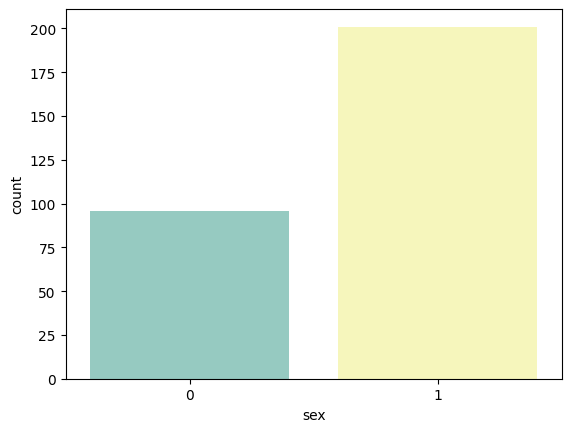

In [11]:
#類別型
sns.countplot(x='condition',data=df,palette="Set3")
plt.show()
sns.countplot(x='sex',data=df,palette="Set3")
plt.show()

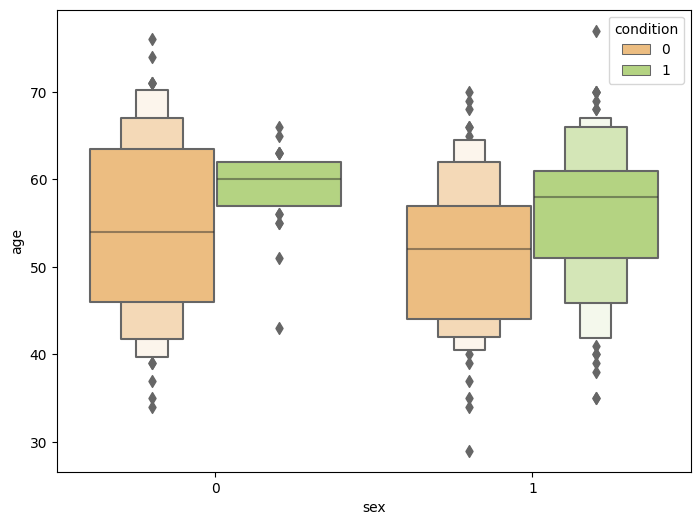

In [12]:
fig,ax=plt.subplots(figsize=(18,6))
plt.subplot(121)
s1=sns.boxenplot(x='sex',y='age',hue='condition',data=df,palette='RdYlGn')
#s1.set_title("Figure 1")

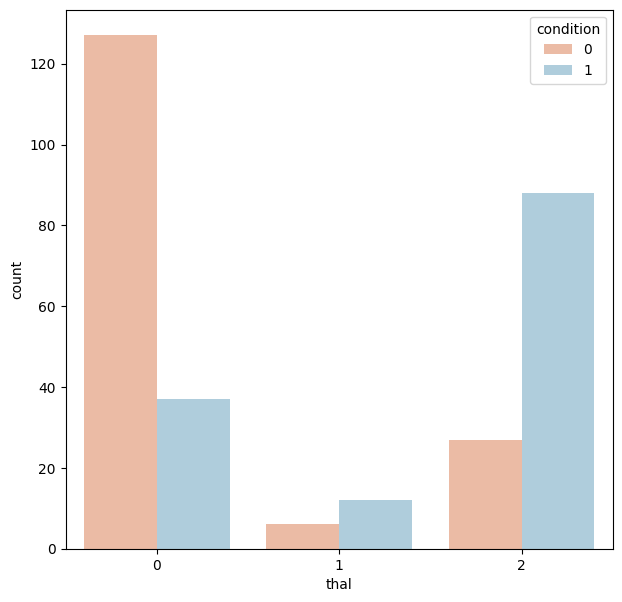

In [13]:
fig,ax=plt.subplots(figsize=(24,7))
plt.subplot(131)
x1=sns.countplot(x='thal',data=df,hue='condition',palette='RdBu')
#x1.set_title('Chest pain type')

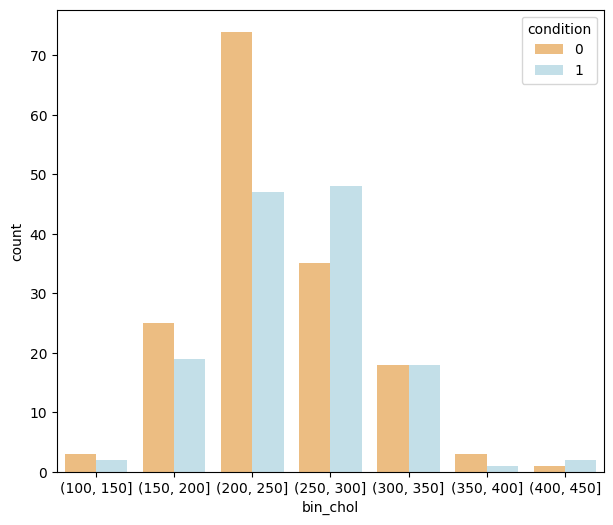

In [14]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1, 3, 2)
cho_bins = [100,150,200,250,300,350,400,450]
df['bin_chol']=pd.cut(df['chol'], bins=cho_bins)
g2=sns.countplot(x='bin_chol',data=df,hue='condition',palette='RdYlBu')
#g2.set_title("Cholestoral vs Heart Disease")

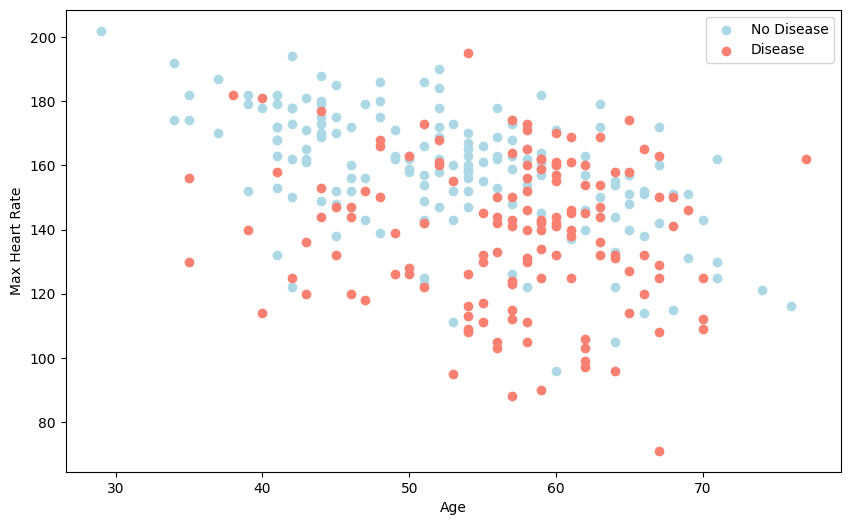

In [15]:
# Creating figure
plt.figure(figsize = (10,6))

# Plotting scatter for age and max heart rate with no disease
plt.scatter(df.age[df.condition == 0],
            df.thalach[df.condition == 0],
            c = "lightblue")

# Plotting scatter for age and max heart rate with disease
plt.scatter(df.age[df.condition == 1],
            df.thalach[df.condition == 1],
            c = "salmon")

# Adding descriptive elements to the plot
#plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.legend(["No Disease", "Disease"]);

In [16]:
#進行 dummy-variable (僅針對類別型欄位)
#欄位名稱會改變
df=pd.get_dummies(df,drop_first=True,prefix_sep=': ')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,"bin_chol: (150, 200]","bin_chol: (200, 250]","bin_chol: (250, 300]","bin_chol: (300, 350]","bin_chol: (350, 400]","bin_chol: (400, 450]"
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0,0,1,0,0,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0,0,1,0,0,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0,0,1,0,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1,0,0,1,0,0,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0,0,1,0,0,0,0


In [17]:
#準備資料
X=df.drop("condition",axis=1,inplace=False)
y=df["condition"]

print("資料筆數:",len(X))
print("欄位數量:",len(X.columns))

資料筆數: 297
欄位數量: 19


轉折點目前發現2可以試試看作為K值


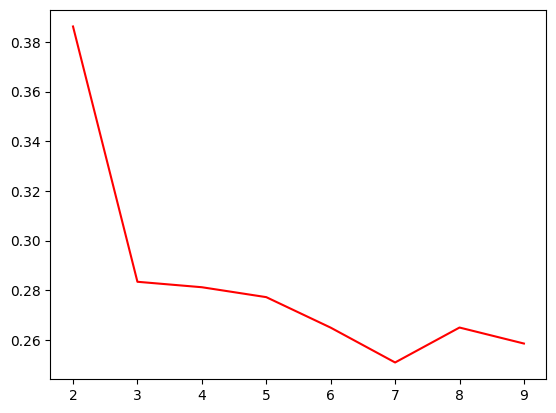

In [18]:
#提供多種scale的方式
#以下四種是最常見的標準化函數
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

full_scaled_date=X
scaled_data=full_scaled_date

from sklearn.cluster import KMeans
#透過輪廓係數(-1,1) 該值越大表示分群效果越好

from sklearn.metrics import silhouette_score

silhouette_avg = []

#由第2群找到第10群，觀察轉折點 (轉折點就是變化量最大的地方，不是看該值的大小)
for i in range(2,10):
    kmeans_fit = KMeans(n_clusters = i).fit(scaled_data)
    silhouette_avg.append(silhouette_score(scaled_data, kmeans_fit.labels_))
    
plt.plot(range(2,10), silhouette_avg,color="red")

print("轉折點目前發現{}可以試試看作為K值".format(2))

In [19]:
#選擇分群數量(K值為2)
n_clusters = 2

#建立Kmeans演算法
kmean = KMeans(n_clusters=n_clusters)

kmean.fit(scaled_data);
print("kmean: k={}".format(n_clusters))

#取得分群結果 (每筆資料都會一個分群代碼，由0開始)
labels = kmean.labels_

#取得分群的中心點(質心)
centers = kmean.cluster_centers_

kmean: k=2


In [20]:
#將分群結果寫入dataframe，有利於分群分析
df['group']=labels

In [21]:
#查看個群數量，由第0群開始排序
df['group'].value_counts().sort_index()

0    186
1    111
Name: group, dtype: int64

In [22]:
#質心
print(centers.shape)

#將質心存起來，下次Re-fresh的時候還可以用
from numpy import savetxt, loadtxt
savetxt('ckd_kmeans_centers20201026.csv', centers, delimiter=',')

#讀取質心的檔案
load_centers = loadtxt('ckd_kmeans_centers20201026.csv', delimiter=',')

#再次執行kmeans程式
kmean_test_centers = KMeans(n_clusters=n_clusters,init=load_centers)
kmean_test_centers.fit(scaled_data)
labels_test_centers = kmean_test_centers.labels_

#將分群結果寫入dataframe，有利於分群分析
df['group_test_centers']=labels_test_centers

(2, 19)


In [23]:
#欄位group與group_test_centers分群結果一模一樣
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,condition,"bin_chol: (150, 200]","bin_chol: (200, 250]","bin_chol: (250, 300]","bin_chol: (300, 350]","bin_chol: (350, 400]","bin_chol: (400, 450]",group,group_test_centers
0,69,1,0,160,234,1,2,131,0,0.1,...,0,0,0,1,0,0,0,0,0,0
1,69,0,0,140,239,0,0,151,0,1.8,...,0,0,0,1,0,0,0,0,0,0
2,66,0,0,150,226,0,0,114,0,2.6,...,0,0,0,1,0,0,0,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,...,0,1,0,0,1,0,0,0,1,1
4,64,1,0,110,211,0,2,144,1,1.8,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,...,2,1,0,1,0,0,0,0,0,0
293,39,1,3,118,219,0,0,140,0,1.2,...,2,1,0,1,0,0,0,0,0,0
294,35,1,3,120,198,0,0,130,1,1.6,...,2,1,1,0,0,0,0,0,0,0
295,35,0,3,138,183,0,0,182,0,1.4,...,0,0,1,0,0,0,0,0,0,0


In [24]:
df[df['group']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,condition,"bin_chol: (150, 200]","bin_chol: (200, 250]","bin_chol: (250, 300]","bin_chol: (300, 350]","bin_chol: (350, 400]","bin_chol: (400, 450]",group,group_test_centers
0,69,1,0,160,234,1,2,131,0,0.1,...,0,0,0,1,0,0,0,0,0,0
1,69,0,0,140,239,0,0,151,0,1.8,...,0,0,0,1,0,0,0,0,0,0
2,66,0,0,150,226,0,0,114,0,2.6,...,0,0,0,1,0,0,0,0,0,0
4,64,1,0,110,211,0,2,144,1,1.8,...,0,0,0,1,0,0,0,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,...,2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,40,1,3,110,167,0,2,114,1,2.0,...,2,1,1,0,0,0,0,0,0,0
292,40,1,3,152,223,0,0,181,0,0.0,...,2,1,0,1,0,0,0,0,0,0
293,39,1,3,118,219,0,0,140,0,1.2,...,2,1,0,1,0,0,0,0,0,0
294,35,1,3,120,198,0,0,130,1,1.6,...,2,1,1,0,0,0,0,0,0,0


In [25]:
df[df['group']==1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,condition,"bin_chol: (150, 200]","bin_chol: (200, 250]","bin_chol: (250, 300]","bin_chol: (300, 350]","bin_chol: (350, 400]","bin_chol: (400, 450]",group,group_test_centers
3,65,1,0,138,282,1,2,174,0,1.4,...,0,1,0,0,1,0,0,0,1,1
9,59,1,0,178,270,0,2,145,0,4.2,...,2,0,0,0,1,0,0,0,1,1
10,59,1,0,170,288,0,2,159,0,0.2,...,2,1,0,0,1,0,0,0,1,1
11,59,1,0,160,273,0,2,125,0,0.0,...,0,1,0,0,1,0,0,0,1,1
13,58,0,0,150,283,1,2,162,0,1.0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,43,0,3,132,341,1,2,136,1,3.0,...,2,1,0,0,0,1,0,0,1,1
284,43,1,3,115,303,0,0,181,0,1.2,...,0,0,0,0,0,1,0,0,1,1
287,42,0,3,102,265,0,2,122,0,0.6,...,0,0,0,0,1,0,0,0,1,1
288,42,1,3,136,315,0,0,125,1,1.8,...,1,1,0,0,0,1,0,0,1,1
